In [1]:
import pandas as pd

In [2]:
import seaborn  as sb

In [3]:
data = pd.read_csv("SetFiltered.csv", sep= ";") 
type(data)

pandas.core.frame.DataFrame

#Erste Erkenntnisse first look

Null gibt es sonst nicht
NAN auch nicht
-1 auch nicht 

In [4]:
data[81:82]


,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
81,C (all),8500,IDOTRR,1Fam,4,4,1920,1950,Gambrel,649,TA,N,1317,6,1,2008,40000


In [5]:
data.describe()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,10629.817778,6.014444,5.652222,1969.347778,1984.185556,1028.166667,1487.441111,6.415556,1.745556,2007.896667,176184.454444
std,9947.088936,1.336912,1.151555,29.573049,20.195265,403.019702,504.588271,1.601786,0.715887,1.306010,71412.482393
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,334.000000,2.000000,0.000000,2006.000000,39300.000000
25%,7432.250000,5.000000,5.000000,1953.000000,1966.000000,790.250000,1102.750000,5.000000,1.000000,2007.000000,130000.000000
50%,9475.000000,6.000000,5.000000,1971.000000,1993.000000,968.500000,1443.500000,6.000000,2.000000,2008.000000,161000.000000
75%,11700.000000,7.000000,6.000000,1998.000000,2002.000000,1249.500000,1750.500000,7.000000,2.000000,2009.000000,205000.000000
max,164660.000000,10.000000,9.000000,2009.000000,2009.000000,3206.000000,4316.000000,12.000000,4.000000,2010.000000,755000.000000


Lot Area riesiges Maximum kann riesige Auswirkungen haben. </br>
Riesiges Minimum und Maximum </br>




In [6]:
data[data["LotArea"].idxmax():data["LotArea"].idxmax()+1]

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
844,RL,164660,Timber,2fmCon,5,6,1965,1965,Gable,1499,Ex,Y,1786,7,2,2008,228950


In [7]:
data["MSZoning"].unique()

array(['RL', 'RM', 'FV', 'RH', 'C (all)'], dtype=object)

In [8]:
data['MSZoning'].value_counts()

RL         716
RM         145
FV          28
RH          10
C (all)      1
Name: MSZoning, dtype: int64

C (all) ist nur alleine 

In [9]:
data['Neighborhood'].value_counts()

NAmes      150
CollgCr    103
OldTown     71
Edwards     53
Sawyer      52
Gilbert     47
NWAmes      46
BrkSide     41
NridgHt     39
SawyerW     37
Somerst     34
Crawfor     34
Mitchel     33
NoRidge     26
Timber      21
IDOTRR      21
SWISU       18
ClearCr     17
StoneBr     13
MeadowV     12
BrDale       9
Blmngtn      9
Veenker      8
NPkVill      5
Blueste      1
Name: Neighborhood, dtype: int64

Blueste kommt nur einmal vor

In [10]:
data['BldgType'].value_counts()

1Fam      759
TwnhsE     68
Duplex     29
Twnhs      27
2fmCon     17
Name: BldgType, dtype: int64

Einfamiliehaushalt ist am häufigsten 

In [11]:
data['OverallQual'].value_counts()

5     248
6     244
7     193
8      92
4      78
9      23
3      13
10      6
1       2
2       1
Name: OverallQual, dtype: int64

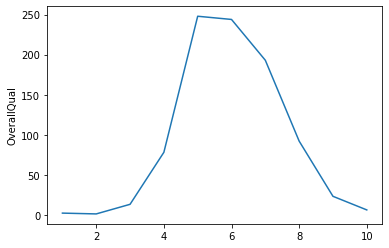

In [12]:
sb.lineplot(data['OverallQual'].value_counts().keys(), data['OverallQual'].value_counts())


schaut nach einer Gaussverteilung aus

In [13]:
data['OverallCond'].value_counts()

5    481
6    158
7    134
8     55
4     41
9     17
3     12
2      1
1      1
Name: OverallCond, dtype: int64

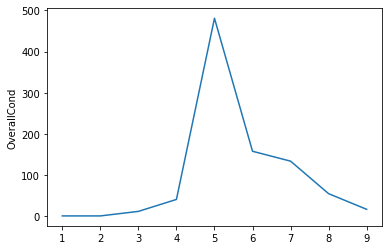

In [14]:
sb.lineplot(data['OverallCond'].value_counts().keys(), data['OverallCond'].value_counts())

In [15]:
data['RoofStyle'].value_counts()

Gable      708
Hip        171
Gambrel      7
Flat         7
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

Giebel und hip dach sind auf häufigsten 

In [16]:
data['HeatingQC'].value_counts()

Ex    448
TA    264
Gd    161
Fa     26
Po      1
Name: HeatingQC, dtype: int64

schlechte warmequaltität der Heizung ist nur 

In [17]:
data['CentralAir'].value_counts()

Y    845
N     55
Name: CentralAir, dtype: int64

Meiste haben eine Klimaanlage

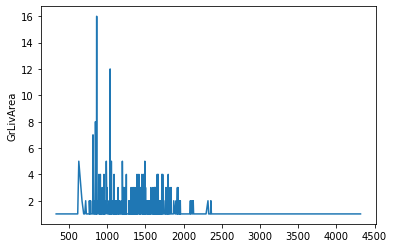

In [18]:
sb.lineplot(data['GrLivArea'].value_counts().keys(), data['GrLivArea'].value_counts())

Viele kleine und der eine ausreisser

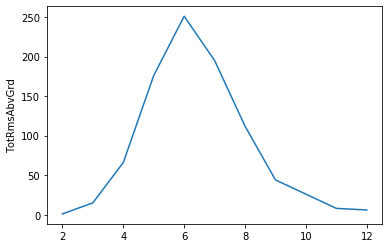

In [19]:
sb.lineplot(data['TotRmsAbvGrd'].value_counts().keys(), data['TotRmsAbvGrd'].value_counts())

Sieht gut aus

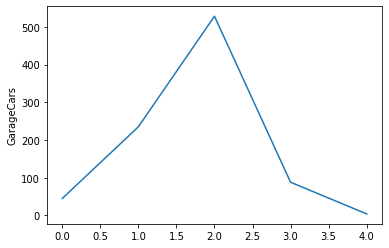

In [20]:
sb.lineplot(data['GarageCars'].value_counts().keys(), data['GarageCars'].value_counts())

geht 

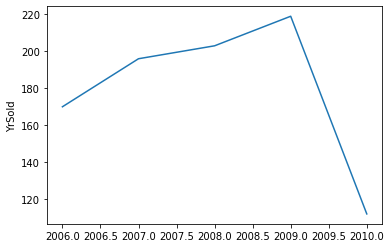

In [21]:
sb.lineplot(data['YrSold'].value_counts().keys(), data['YrSold'].value_counts())

Was war 2009.5 ?

In [22]:
data['YrSold'].value_counts()

2009    219
2008    203
2007    196
2006    170
2010    112
Name: YrSold, dtype: int64

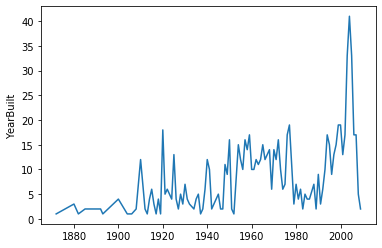

In [23]:
sb.lineplot(data['YearBuilt'].value_counts().keys(), data['YearBuilt'].value_counts())

In [24]:
YearBuilt = data['YearBuilt'].value_counts()

In [25]:
built = 0
for i in range(1940,1961):
    if i in YearBuilt.keys():
        built+=YearBuilt[i]
        print("{}: {}".format(i,YearBuilt[i]))
    else:
        print("Kien Haus im Jahr: {}".format(i))
built

1940: 12
1941: 10
1942: 2
Kien Haus im Jahr: 1943
Kien Haus im Jahr: 1944
1945: 5
1946: 2
1947: 2
1948: 11
1949: 9
1950: 16
1951: 2
1952: 1
1953: 8
1954: 15
1955: 12
1956: 10
1957: 16
1958: 14
1959: 17
1960: 10


174

In [26]:
data['YearRemodAdd'].value_counts()

1950    112
2005     53
2004     46
2006     38
2000     37
2002     36
2003     35
2007     32
1996     26
1995     25
1997     23
1998     23
1999     20
1994     16
2001     15
1976     15
2008     14
1972     14
1993     13
1970     13
1977     13
1966     12
1959     12
1990     12
1978     11
1965     11
1968     11
1967     11
1973     10
1971     10
1980      9
1964      9
1962      9
1991      9
1963      8
1975      8
1985      8
1988      8
1957      7
1960      7
1992      7
1954      7
1956      7
1987      7
1981      7
1955      7
1958      7
1969      6
1989      6
1982      6
1953      6
2009      4
1961      4
1979      4
1983      3
1984      3
1986      3
1974      2
1951      2
1952      1
Name: YearRemodAdd, dtype: int64

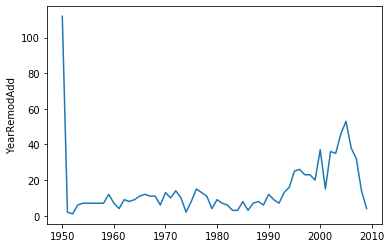

In [27]:
sb.lineplot(data['YearRemodAdd'].value_counts().keys(), data['YearRemodAdd'].value_counts())

1950 gab es eine große renoirierungswelle

In [28]:
data.corr()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
LotArea,1.000000,0.078351,0.008624,-0.002740,0.013903,0.215555,0.242049,0.171731,0.175046,-0.029411,0.294995
OverallQual,0.078351,1.000000,-0.067541,0.506915,0.498863,0.503705,0.579224,0.420016,0.571014,0.014871,0.779105
OverallCond,0.008624,-0.067541,1.000000,-0.409406,0.108340,-0.178404,-0.064446,-0.042172,-0.173576,-0.012827,-0.045663
YearBuilt,-0.002740,0.506915,-0.409406,1.000000,0.532446,0.375331,0.150515,0.058774,0.503326,0.042634,0.473111
YearRemodAdd,0.013903,0.498863,0.108340,0.532446,1.000000,0.251307,0.234629,0.143653,0.385040,0.066435,0.465537
TotalBsmtSF,0.215555,0.503705,-0.178404,0.375331,0.251307,1.000000,0.392101,0.256067,0.408777,0.047929,0.629429
GrLivArea,0.242049,0.579224,-0.064446,0.150515,0.234629,0.392101,1.000000,0.835156,0.476391,-0.014204,0.757823
TotRmsAbvGrd,0.171731,0.420016,-0.042172,0.058774,0.143653,0.256067,0.835156,1.000000,0.357133,-0.017735,0.550198
GarageCars,0.175046,0.571014,-0.173576,0.503326,0.385040,0.408777,0.476391,0.357133,1.000000,0.009918,0.633643
YrSold,-0.029411,0.014871,-0.012827,0.042634,0.066435,0.047929,-0.014204,-0.017735,0.009918,1.000000,0.009535


Starke corr zwischen preis mit Qulität, TotalMsmtSF, LivArea, größe Garage. außerdem livArea und room above ground, Idee: eines weglassen  

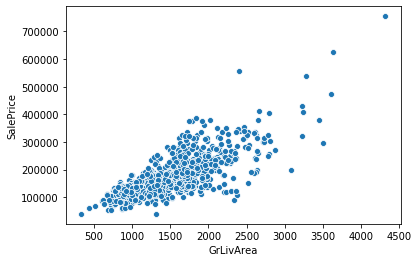

In [29]:
sb.scatterplot(data["GrLivArea"],data["SalePrice"])

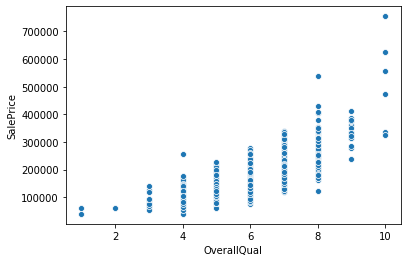

In [30]:
sb.scatterplot(data["OverallQual"],data["SalePrice"])

qualitat hat range

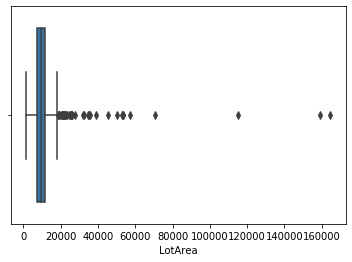

In [31]:
sb.boxplot(data["LotArea"])

aussreiser nach oben viele 

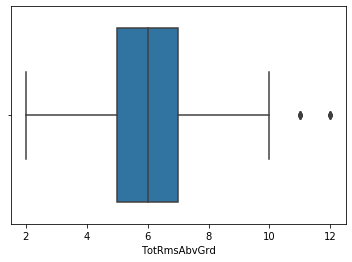

In [32]:
sb.boxplot(data["TotRmsAbvGrd"])

passt mit 2 aussreißer

In [33]:
data = data.sample(frac=1, random_state = 42)
#Die Daten zufällig anordnen, random state damit Beispielrechnung richtig und Ergebnisse gelcih bleiben

In [34]:
labels = data["SalePrice"]
labels

70     135000
827     82000
231    113000
588    170000
39     337500
        ...  
106    160000
270    262500
860    104900
435    403000
102    277500
Name: SalePrice, Length: 900, dtype: int64

In [35]:
lenDataSet = len(data)

In [36]:
import nltk
import numpy as np


def text_to_numbers(text, cutoff_for_rare_words = 1):
    """Function to convert text to numbers. Text must be tokenzied so that
    test is presented as a list of words. The index number for a word
    is based on its frequency (words occuring more often have a lower index).
    If a word does not occur as many times as cutoff_for_rare_words,
    then it is given a word index of zero. All rare words will be zero.
    """
    
    # Flatten list if sublists are present
    if len(text) > 1:
        flat_text = [sublist for sublist in text]
        
    else:
        flat_text = text
    
    # get word freuqncy
    fdist = nltk.FreqDist(flat_text)

    # Convert to Pandas dataframe
    df_fdist = pd.DataFrame.from_dict(fdist, orient='index')
    df_fdist.columns = ['Frequency']

    # Sort by word frequency
    df_fdist.sort_values(by=['Frequency'], ascending=False, inplace=True)

    # Add word index
    number_of_words = df_fdist.shape[0]
    df_fdist['word_index'] = list(np.arange(number_of_words)+1)

   
    
    # Convert pandas to dictionary
    word_dict = df_fdist['word_index'].to_dict()
   
    
    # Use dictionary to convert words in text to numbers
    text_numbers = []
    for string in text:
        string_numbers = word_dict[string]
        text_numbers.append(string_numbers)  
    
    return (text_numbers)

In [37]:
data.loc[:,"MSZoning"]

70     RM
827    RH
231    RL
588    RL
39     RL
       ..
106    RH
270    RL
860    RL
435    RL
102    RL
Name: MSZoning, Length: 900, dtype: object

In [38]:
stringLabels = ["MSZoning","Neighborhood","BldgType","RoofStyle","HeatingQC","CentralAir"]

In [39]:
for element in stringLabels:
    data.loc[:,element] = text_to_numbers(data.loc[:,element])
data

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
70,2,10320,15,1,6,7,1906,1995,1,756,1,1,1469,7,1,2008,135000
827,4,8400,10,1,4,4,1950,1950,1,721,3,1,841,4,1,2009,82000
231,1,21750,13,1,5,5,1954,1954,2,988,1,1,988,4,2,2008,113000
588,1,9967,6,1,7,5,2000,2000,1,384,1,1,1430,8,2,2007,170000
39,1,12456,9,1,10,5,2006,2007,2,1700,1,1,1718,7,3,2009,337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,7082,17,5,5,8,1916,1995,1,686,3,1,1928,10,0,2006,160000
270,1,20781,7,1,7,7,1968,2003,2,1568,2,1,2156,9,2,2006,262500
860,1,9738,4,1,5,7,1924,1950,1,784,3,1,1221,7,1,2006,104900
435,1,15138,14,1,8,5,1995,1996,1,1462,1,1,2794,9,3,2009,403000


In [40]:
rawdata = data.loc[:,"MSZoning":"YrSold"]
rawdata

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold
70,2,10320,15,1,6,7,1906,1995,1,756,1,1,1469,7,1,2008
827,4,8400,10,1,4,4,1950,1950,1,721,3,1,841,4,1,2009
231,1,21750,13,1,5,5,1954,1954,2,988,1,1,988,4,2,2008
588,1,9967,6,1,7,5,2000,2000,1,384,1,1,1430,8,2,2007
39,1,12456,9,1,10,5,2006,2007,2,1700,1,1,1718,7,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,7082,17,5,5,8,1916,1995,1,686,3,1,1928,10,0,2006
270,1,20781,7,1,7,7,1968,2003,2,1568,2,1,2156,9,2,2006
860,1,9738,4,1,5,7,1924,1950,1,784,3,1,1221,7,1,2006
435,1,15138,14,1,8,5,1995,1996,1,1462,1,1,2794,9,3,2009


In [41]:
import math

In [42]:
trainData = rawdata[0:math.floor(lenDataSet*0.8)]

In [43]:
validateData = rawdata[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)] 

In [44]:
testData = rawdata[math.ceil(lenDataSet*0.95):]

In [45]:
trainLabels = labels[0:math.floor(lenDataSet*0.8)] 

In [46]:
validateLabels = labels[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)]

In [47]:
testLabels = labels[math.ceil(lenDataSet*0.95):]

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
rf.fit(trainData, trainLabels)
#n_estimators = Anzahl an trees 
#random_state = 
# max_featurs = anzahl der feautres maximal 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [49]:
rf.score(validateData, validateLabels)


0.9078987120985255

In [50]:
import sklearn
#import sklearn.cross_validation

In [51]:
 from sklearn.model_selection import cross_val_score

In [52]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = 3)
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.88445389, 0.83902167, 0.88480253, 0.87762338, 0.83973762])

In [53]:
rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = "sqrt")
scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
scores

array([0.89252636, 0.851167  , 0.88001687, 0.88163037, 0.84348088])

In [54]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)


In [55]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 1)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [56]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 1)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=5)
#sum(scores)/len(scores)

In [57]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures - 2)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [58]:
#sqrtFeatures = 4
#rfK = RandomForestRegressor(n_estimators = 1000, random_state = 42, max_features = sqrtFeatures + 2)
#scores = cross_val_score(rfK, trainData, trainLabels, cv=10)
#sum(scores)/len(scores)

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor(
    max_depth=1,
    n_estimators=1000,
    learning_rate=0.1
)
gbr.fit(trainData, trainLabels)
gbr.score(validateData, validateLabels)
#gbr.predict(rawdata[1:2])

0.906265023714941

In [61]:
linearData = trainData.iloc[:, [4 ,9, 12]]


In [62]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression().fit(linearData, trainLabels)
#clf.coef_
#clf.intercept_
#clf.score


In [63]:
linearDataV = validateData.iloc[:, [4 ,9, 12]]
clf.score(linearDataV,validateLabels)

0.8134321276352642

In [64]:
clf.coef_

array([20733.21608279,    45.01412324,    62.89920511])

In [65]:
clf.intercept_

-88040.06676312693

In [66]:
data[1:2]

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
827,4,8400,10,1,4,4,1950,1950,1,721,3,1,841,4,1,2009,82000


SalePrice = 20733.21608279 * OverallQual + 45.01412324 * TotalBsmtSF +  62.89920511 * GrLIvArea 
SalePrice = 20733.21608279 * 4 + 45.01412324 * 721 +   62.89920511 * 841 - 88040.06676312693(1)
predicted SalePrice =  80246.21192158308
actuelle SalePrice =  82000
p(Abweichung) =  1 -80246.21192158308/82000 = 0.021387659492889344


In [67]:
clf.predict(data.iloc[1:2, [4 ,9, 12]])

array([80246.21191609])

#Klassifikation


In [68]:
caData = data.loc[:, data.columns != 'CentralAir']
caData

,MSZoning,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,TotalBsmtSF,HeatingQC,GrLivArea,TotRmsAbvGrd,GarageCars,YrSold,SalePrice
70,2,10320,15,1,6,7,1906,1995,1,756,1,1469,7,1,2008,135000
827,4,8400,10,1,4,4,1950,1950,1,721,3,841,4,1,2009,82000
231,1,21750,13,1,5,5,1954,1954,2,988,1,988,4,2,2008,113000
588,1,9967,6,1,7,5,2000,2000,1,384,1,1430,8,2,2007,170000
39,1,12456,9,1,10,5,2006,2007,2,1700,1,1718,7,3,2009,337500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,7082,17,5,5,8,1916,1995,1,686,3,1928,10,0,2006,160000
270,1,20781,7,1,7,7,1968,2003,2,1568,2,2156,9,2,2006,262500
860,1,9738,4,1,5,7,1924,1950,1,784,3,1221,7,1,2006,104900
435,1,15138,14,1,8,5,1995,1996,1,1462,1,2794,9,3,2009,403000


In [69]:
caLabels = data["CentralAir"]
caLabels

70     1
827    1
231    1
588    1
39     1
      ..
106    1
270    1
860    1
435    1
102    1
Name: CentralAir, Length: 900, dtype: int64

In [70]:
trainCaData = caData[0:math.floor(lenDataSet*0.8)]

In [71]:
validateCaData = caData[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)] 

In [72]:
testCaData = caData[math.ceil(lenDataSet*0.95):]

In [73]:
trainCaLabels = caLabels[0:math.floor(lenDataSet*0.8)] 

In [74]:
validateCaLabels = caLabels[math.ceil(lenDataSet*0.8):math.floor(lenDataSet*0.95)]

In [75]:
testCaLabels = caLabels[math.ceil(lenDataSet*0.95):]

In [76]:
from sklearn import tree
cadtc= tree.DecisionTreeClassifier()
cadtc = cadtc.fit(trainCaData, trainCaLabels)
cadtc.score(validateCaData,validateCaLabels)


0.9481481481481482

C:\Users\fetzert\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


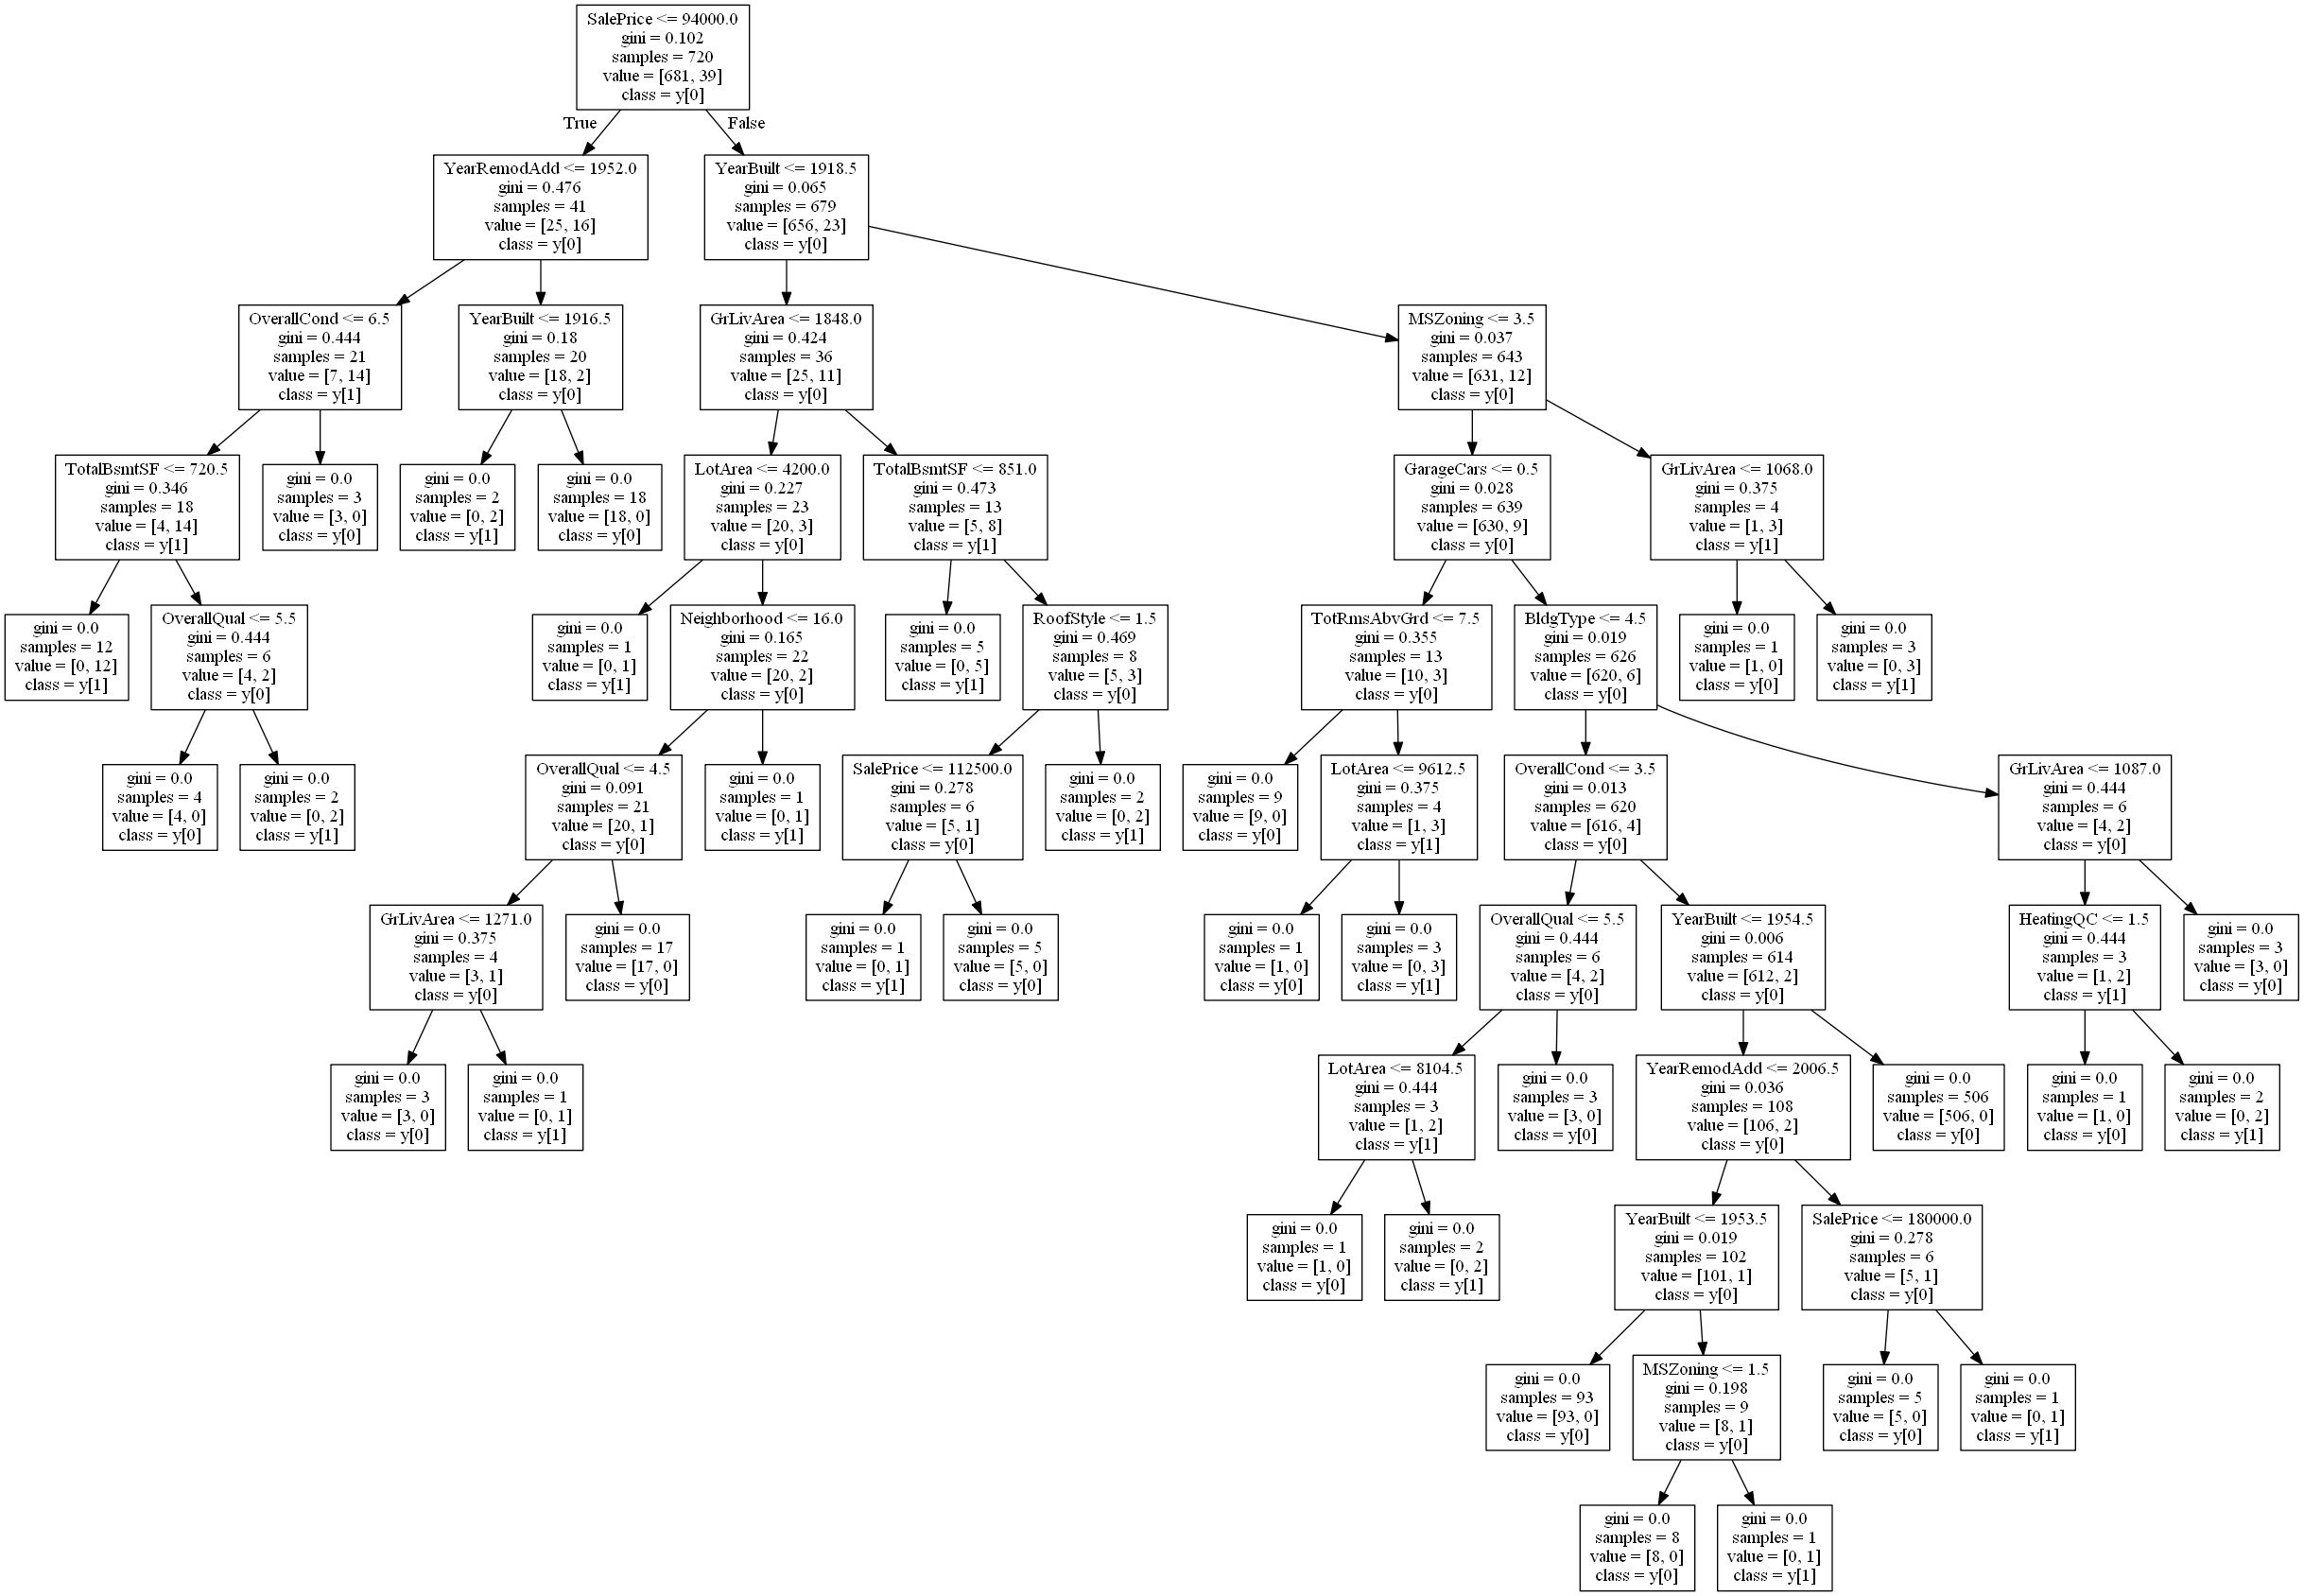

In [77]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_names = caData.columns
tree.export_graphviz(cadtc, out_file=dot_data,
                     feature_names=feature_names ,
                     class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix

def readData(filename):
    if str(filename):
        data = pd.read_csv(filename, sep= ";")
        return data;
    
def prepareData(dataFrame):
    if type(data) == pd.core.frame.DataFrame:
        return data
    
def applyModel(model, dataFrame):
    if type(data) == pd.core.frame.DataFrame:
       applyLinearRegressor(model, dataFrame)
            
def applyLinearRegressor(model, dataFrame):
    if type(data) == pd.core.frame.DataFrame:
        y = dataFrame.SalePrice
        #x = dataFrame.drop('SalePrice', axis=1)
        x = dataFrame.iloc[:, [4 ,9, 12]]
        
        #Führe Prediction durch und berechne Messwerte
        prediction = model.predict(x)
        r2 = r2_score(y,prediction)
        mse = mean_squared_error(y, prediction)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((y - prediction) / y)) * 100
        
        print('r^2: {}\nmse: {}\nrmse: {}\nmape: {}\n'.format(r2,mse,rmse,mape))
        


In [87]:
applyModel(clf,data)

r^2: 0.7977696523981921
mse: 1030176812.92162
rmse: 32096.367596997952
mape: 14.682583608600167



In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [91]:
rfC = RandomForestClassifier(max_depth=2, random_state=0)
rfC.fit(trainCaData, trainCaLabels)
rfC.score(validateCaData, validateCaLabels)




0.9185185185185185

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

In [94]:
gbC = GradientBoostingClassifier(n_estimators=20, max_features=2, max_depth=2, random_state=0)
gbC.fit(trainCaData, trainCaLabels)
gbC.score(validateCaData, validateCaLabels)


0.9333333333333333